In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [39]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0 
X_test = X_test / 255.0

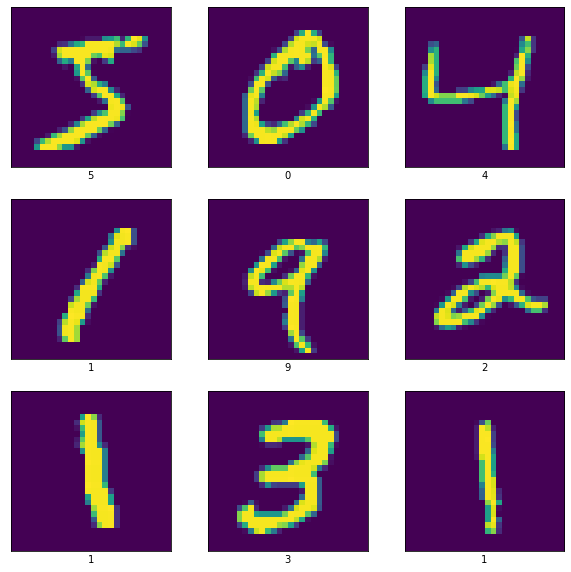

In [43]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(y_train[i])
plt.show()

In [ ]:
m = tf.keras.models.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(128, activation = 'relu'),
                                tf.keras.layers.Dropout(0.2),
                                tf.keras.layers.Dense(10)
])

In [ ]:
p = np.array(m(X_train))
p

array([[ 0.5394785 , -0.12272212,  0.9193161 , ...,  0.41517732,
        -0.3789807 , -0.87227833],
       [ 0.17907391, -0.38277358,  0.4775224 , ...,  0.13636303,
        -0.23140424, -0.87323546],
       [ 0.26232728,  0.12891048,  0.16630177, ...,  0.86517775,
        -0.3043212 , -1.0263238 ],
       ...,
       [ 0.51925176, -0.05907093, -0.04599736, ...,  0.5607646 ,
        -0.37938014, -0.36678326],
       [ 0.49862832, -0.48441568,  0.15171747, ..., -0.1998389 ,
        -0.5524225 , -0.6827275 ],
       [ 0.42455885, -0.14414556, -0.11718291, ...,  0.6053975 ,
        -0.00829128, -0.39380005]], dtype=float32)

In [ ]:
np.array(tf.nn.softmax(p))

array([[0.13262345, 0.06839593, 0.19390173, ..., 0.1171216 , 0.05293447,
        0.03232229],
       [0.10474563, 0.05972121, 0.1411726 , ..., 0.10036603, 0.06948122,
        0.0365699 ],
       [0.13005838, 0.11381412, 0.11815034, ..., 0.23765828, 0.07379824,
        0.0358496 ],
       ...,
       [0.14238805, 0.07985666, 0.08090753, ..., 0.14842339, 0.05796991,
        0.05870477],
       [0.14620435, 0.05470534, 0.10334723, ..., 0.0727143 , 0.05110869,
        0.04486462],
       [0.13139997, 0.07440636, 0.07643985, ..., 0.15744632, 0.08523361,
        0.05796776]], dtype=float32)

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
np.array(loss(y_train, p))

array(2.4508984, dtype=float32)

In [ ]:
m.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])

In [ ]:
m.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2941 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1403 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.9739
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0731 - accuracy: 0.9774


In [ ]:
m.evaluate(X_test, y_test)

313/313 [==============================] - 0s 915us/step - loss: 0.0799 - accuracy: 0.9741


[0.07987066358327866, 0.9740999937057495]

In [ ]:
p_m = tf.keras.Sequential([m, tf.keras.layers.Softmax()])

In [ ]:
p_m(X_test)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[1.16361232e-08, 5.49730128e-09, 2.06548702e-05, ...,
        9.99233603e-01, 2.86834347e-06, 5.76495631e-06],
       [1.02534881e-09, 5.80763663e-06, 9.99989986e-01, ...,
        7.32267606e-15, 1.70191528e-09, 6.29196605e-14],
       [3.01397591e-07, 9.97892439e-01, 1.03699742e-03, ...,
        6.57668745e-04, 1.38153089e-04, 5.09474773e-07],
       ...,
       [1.08263216e-11, 2.87974297e-11, 7.30576444e-09, ...,
        6.03994692e-07, 6.13179850e-07, 4.72833108e-06],
       [6.71746463e-08, 1.83820834e-08, 4.13651696e-10, ...,
        1.43745345e-08, 2.42263977e-05, 2.46022841e-10],
       [1.21420456e-08, 2.66348228e-12, 2.37714190e-07, ...,
        1.12101402e-13, 1.17821020e-09, 2.49080739e-11]], dtype=float32)>